# CNN (Convolutional Neural Network)

## Importing Libraires

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
tf.device(device_name)

Found GPU at: /device:GPU:0


## Loading Dataset
Keras has variours datasets already present in it, we are goint to use one of them known as Fashion MNIST dataset.

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## About Dataset
The dataset consists of 60K train images and 10K test images belongin to 10 classes. Each image is a single channel image with height and width of 28 pixels.

In [4]:
print('Shape of X train:',X_train.shape,', Shape of y train:' , y_train.shape)
print('Shape of X test :', X_test.shape,', Shape of y test :', y_test.shape)

Shape of X train: (60000, 28, 28) , Shape of y train: (60000,)
Shape of X test : (10000, 28, 28) , Shape of y test : (10000,)


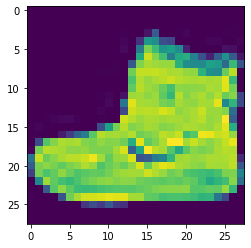

In [5]:
# sample image
plt.imshow(X_train[0].reshape(28, 28))

## Data Preprocessing
We will now normalize the image pixel values.

As the pixel values range from 1-255 dividing each of them by 255 works good enough.

The imput to our model needs to be 4 dimentional i.e. (none, height, width, channel), therefore we need to reshape our image from (28 ,28) each, to (28, 28, 1). 

In [6]:
X_train = X_train/255
X_test = X_test/255

channel = 1
img_h , img_w = X_train.shape[1:]

X_train = X_train.reshape(X_train.shape[0], img_h, img_w, channel)
X_test = X_test.reshape(X_test.shape[0], img_h, img_w, channel)

input_shape = (img_h, img_w, channel)

Our dataset has 10 target classes

We will one hot encode them and make a dictionary that gives class for each corresponding integer class value.

In [7]:
no_of_classes = 10
y_train_oh = np.eye(no_of_classes)[y_train]
y_test_oh = np.eye(no_of_classes)[y_test]

In [8]:
index_to_class = {0: 'T-shirt',
                  1: 'Trouser',
                  2: 'Pullover',
                  3: 'Dress',
                  4: 'Coat',
                  5: 'Sandle',
                  6: 'Sirt',
                  7: 'Sneaker',
                  8: 'Bag',
                  9: 'Ankle Boot'}

## Model Building
Conv2D is the Convolutional layers that we are going to use for the images.
- filters: number of filters we are going to use
- kernel_size: number of filter we will use
- strides: number of pixels we skip when moving the filers

Flastten Layer: A flatten operation on a tensor reshapes the tensor to have the shape that is equal to the number of elements contained in tensor non including the batch dimension.  

In [9]:
input_layer = Input(input_shape)

x = Conv2D(filters=4, kernel_size=5, activation='relu')(input_layer)
x = Conv2D(filters=8, kernel_size=5, strides=(2, 2), activation='relu')(x)
x = Conv2D(filters=16, kernel_size=5, strides=(2, 2), activation='relu')(x)
x = Flatten()(x)
x = Dense(units= 64, activation='relu')(x)
x = Dense(units=10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 4)         104       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 8)         808       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          3216      
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                9280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650   

## Model Training

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_oh, epochs=20, batch_size=32, validation_data=(X_test, y_test_oh))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.8107 - accuracy: 0.7030 - val_loss: 0.5009 - val_accuracy: 0.8150
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4530 - accuracy: 0.8343 - val_loss: 0.4424 - val_accuracy: 0.8387
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3992 - accuracy: 0.8528 - val_loss: 0.4259 - val_accuracy: 0.8450
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3634 - accuracy: 0.8655 - val_loss: 0.3823 - val_accuracy: 0.8599
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3415 - accuracy: 0.8728 - val_loss: 0.3872 - val_accuracy: 0.8585
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3262 - accuracy: 0.8782 - val_loss: 0.3663 - val_accuracy: 0.8650
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.8825 - val_loss: 0.3696 - val_accuracy:

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

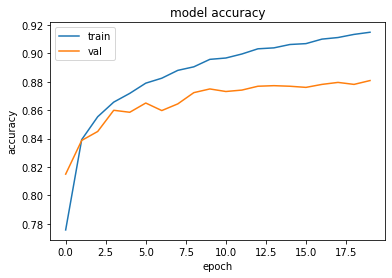

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

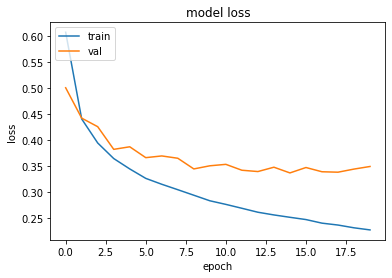

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Testing
Idealy training and validation sets are different but we are using the same set here.

You can see the predictions and the resprecitve image below them in the further cells.

In [15]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

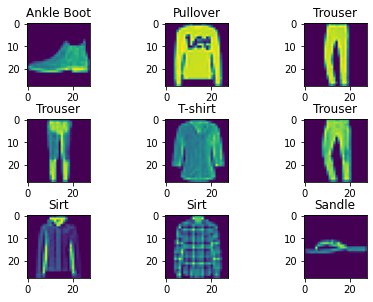

In [16]:
row = 3
col = 3
printX = X_test.reshape(-1, 28, 28)

fig, axs = plt.subplots(row, col)

for i in range(row):
  for j in range(col):
    axs[i, j].title.set_text('{}'.format(index_to_class[predictions[i*col + j]]))
    axs[i, j].imshow(printX[(i*col)+j],)

fig.tight_layout(pad=0.0) 
plt.show() 